### K-Nearest Neighbor - K-Neighbors Classifier

#### Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Import dataset

In [2]:
#hearing tests
df = pd.read_csv('hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [3]:
df['test_result'].value_counts() 
#3000 passed the hearing test, 2000 did not pass

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='age', ylabel='physical_score'>

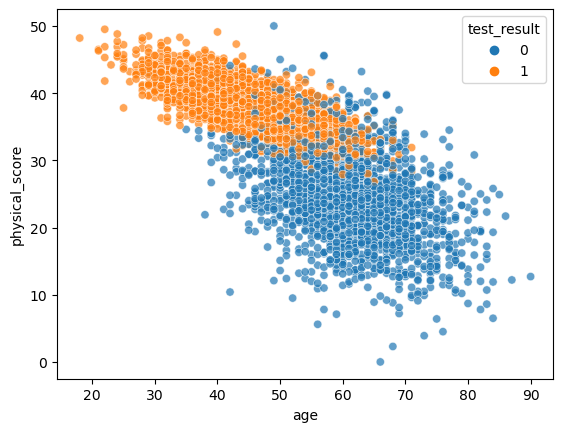

In [4]:
sns.scatterplot(data = df, x='age', y='physical_score', hue='test_result', alpha=0.7) 

#### Separate X features & y labels

In [5]:
X = df.drop('test_result', axis=1)
y = df['test_result']

#### Split Training/Test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

#### Feature Scaling (Standard Scaler)

In [7]:
from sklearn.preprocessing import StandardScaler #Always scale for KNN because it is using distance
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Train the model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  #all of these are default values anyway
model.fit(scaled_X_train, y_train)

KNeighborsClassifier()

#### Test the model

In [9]:
y_pred = model.predict(scaled_X_test)
new_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
new_df.sample(5)

C:\Users\btemo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,y_test,y_pred
2716,1,1
480,0,0
3835,0,0
4840,0,0
3926,1,1


#### Evaluate the model

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# model.coef_ ----does not involve learning a set of parameters or coefficients from the training data

print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f"Precision Score: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

Accuracy Score: 0.916
Precision Score: 0.9157650475816234
Recall Score: 0.916
F1 Score: 0.9157432937181663


C:\Users\btemo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\btemo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


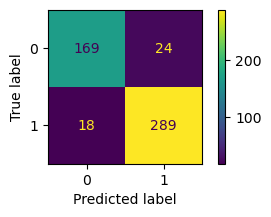

In [11]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, scaled_X_test, y_test).figure_.set_size_inches(4, 2)

In [12]:
confusion_matrix(y_test, y_pred)

array([[169,  24],
       [ 18, 289]], dtype=int64)

In [13]:
report = classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report # this breaks down the metrics by class 

,precision,recall,f1-score,support
0,0.903743,0.875648,0.889474,193.000
1,0.923323,0.941368,0.932258,307.000
accuracy,0.916000,0.916000,0.916000,0.916
macro avg,0.913533,0.908508,0.910866,500.000
weighted avg,0.915765,0.916000,0.915743,500.000


In [14]:
# can also predict probability for a point, not just for the class (1, or 0)
probability_data = model.predict_proba(scaled_X_test)
new_df['PercentChance0Class'] = probability_data[:, 0]
new_df['PercentChance1Class'] = probability_data[:, 1]
new_df

#for row 188
# there is 80% chance of belonging to class 1
# there is 20% chance of belonging to class 0

,y_test,y_pred,PercentChance0Class,PercentChance1Class
1718,1,1,0.0,1.0
2511,1,1,0.0,1.0
345,0,0,1.0,0.0
2521,1,1,0.0,1.0
54,0,0,1.0,0.0
...,...,...,...,...
4770,1,1,0.0,1.0
188,1,1,0.2,0.8
3335,0,0,1.0,0.0
4583,0,0,1.0,0.0


#### ROC curve

C:\Users\btemo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\btemo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


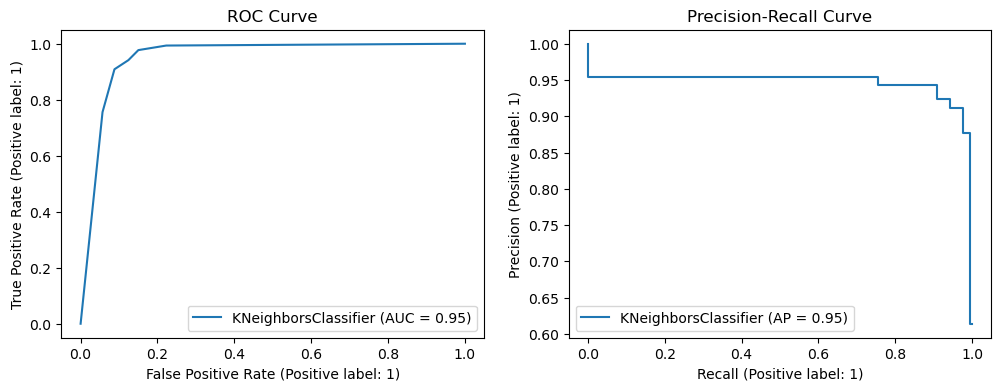

In [15]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_roc_curve(model, scaled_X_test, y_test, ax=ax1)
ax1.set_title('ROC Curve')

plot_precision_recall_curve(model, scaled_X_test, y_test, ax=ax2)
ax2.set_title('Precision-Recall Curve')

plt.show()

#Need to understand these Curves better

#### Visualize

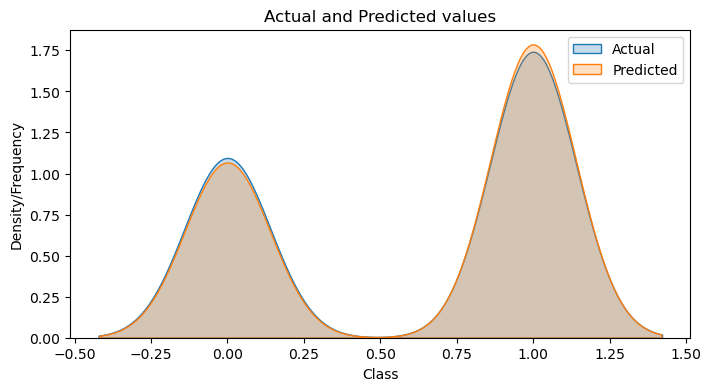

In [16]:
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)

plt.title('Actual and Predicted values')
plt.xlabel('Class')
plt.ylabel('Density/Frequency')
plt.legend()
plt.show()

# y_test & y_pred largely overlap, thus the predictions are closely aligned with the actual values.

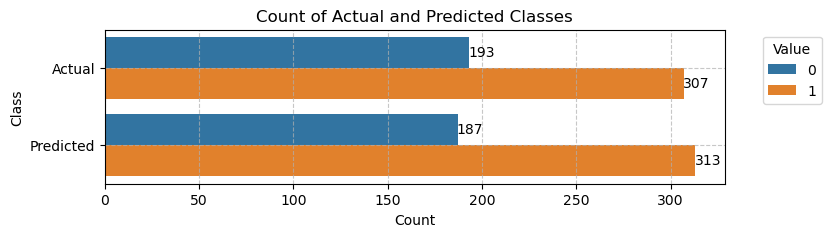

In [17]:
# Combine y_test and y_pred into a single DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the counts of each class
plt.figure(figsize=(8, 2))
plot = sns.countplot(y='variable', hue='value', data=pd.melt(comparison_df))

# Add counts on top of the bars
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (9, 0), 
                  textcoords = 'offset points')

plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Count of Actual and Predicted Classes')
plt.ylabel('Class')
plt.xlabel('Count')
plt.show()

#### Predict future patient

In [18]:
model.predict(scaler.transform([[33, 40]]))
#if patient is age 33 and has physical score of 40, then they will pass the hearing test

C:\Users\btemo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\btemo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1], dtype=int64)

In [19]:
model.predict_proba(scaler.transform([[33, 40]]))
# the model is 100% sure that this new patient belongs to 1 class (in other words that it will pass the hearing test)

C:\Users\btemo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0., 1.]])

#### Elbow method
How to choose the number of K?

Text(0, 0.5, 'Error Rate')

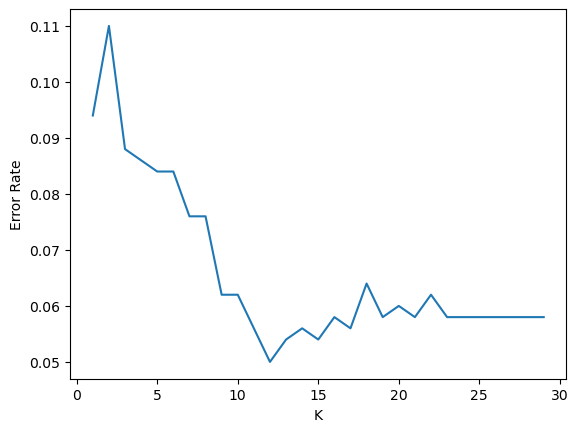

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    
    test_error_rates.append(test_error)
    
    
#visualize the elbow method
plt.plot(range(1, 30), test_error_rates)
plt.xlabel('K')
plt.ylabel('Error Rate')

# it seems that k=11 is the number, as the rest increase the error rate
# Lets do Grid Search with Cross Validation to show us what the optimal value is

#### Set up GridSearch Cross Validation process to tell you what is the optimal number of k

In [21]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler', scaler), ('knn', knn)]

from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

from sklearn.model_selection import GridSearchCV
k_values = list(range(1, 20))

param_grid = {'knn__n_neighbors': k_values}

full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train, y_train) #no need to scale it

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [22]:
full_cv_classifier.best_estimator_.get_params()
#note below says knn_n_neighbors it chose 9 as the number of k

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=9))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=9),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 9,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [23]:
full_pred = full_cv_classifier.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, full_pred)}')
print(f"Precision Score: {precision_score(y_test, full_pred, average='weighted')}")
print(f"Recall Score: {recall_score(y_test, full_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, full_pred, average='weighted')}")

Accuracy Score: 0.938
Precision Score: 0.9384874999999999
Recall Score: 0.938
F1 Score: 0.9375623142672671


In [ ]:
#Previous results with the default parameters:

#Accuracy Score: 0.916
#Precision Score: 0.9157650475816234
#Recall Score: 0.916
#F1 Score: 0.9157432937181663

#it improved the accuracy by 2.2%

#------------------oohhh I like the cross validation--------------------